In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read csv Data
df = pd.read_csv(r'C:\Users\Khushi\Documents\Unified Mentor Internship\Amazon Data\Amazon Sales data.csv')
fdf=df

In [4]:
fdf.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
#check the data types of columns
fdf.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
# Convert 'Order Date' to datetime format
fdf['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Convert 'Ship Date' to datetime format
fdf['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Extract Delivery Day, Month and Delivery Year
fdf['Order Day'] = fdf['Order Date'].dt.day
fdf['Order Month'] = fdf['Order Date'].dt.day
fdf['Order Year'] = fdf['Order Date'].dt.year

In [7]:
fdf.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Day,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,28,28,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,22,22,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2,2,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,20,20,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,1,1,2013


In [8]:
# Group by 'Region' and calculate total revenue, total cost, and total profit
region_performance = fdf.groupby('Region').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()
print(region_performance)

                              Region  Total Revenue   Total Cost  Total Profit
0                               Asia    21347091.02  15233245.15    6113845.87
1              Australia and Oceania    14094265.13   9372105.10    4722160.03
2  Central America and the Caribbean     9170385.49   6323477.64    2846907.85
3                             Europe    33368932.11  22285993.48   11082938.63
4       Middle East and North Africa    14052706.58   8291514.72    5761191.86
5                      North America     5643356.55   4185413.79    1457942.76
6                 Sub-Saharan Africa    39672031.43  27488820.03   12183211.40


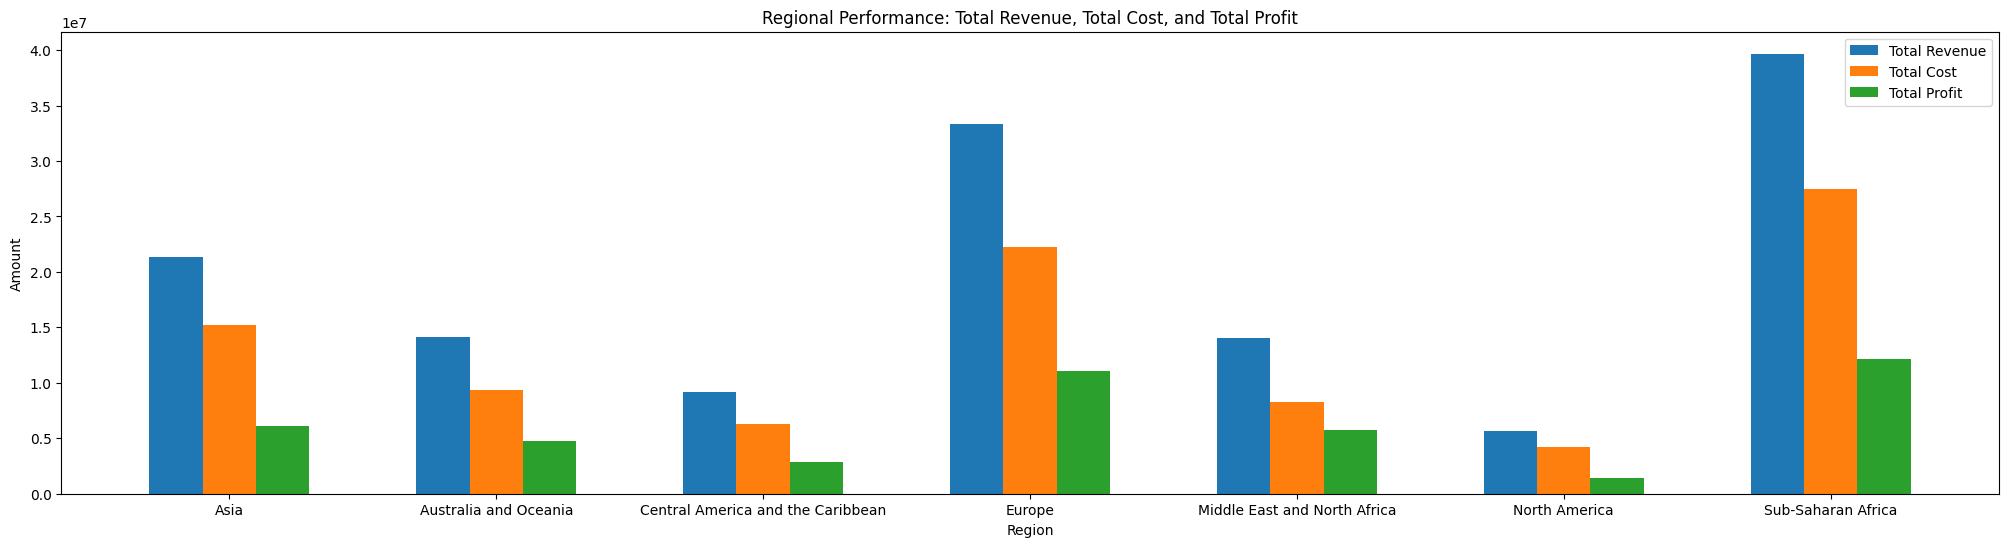

In [9]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(25, 6))

# Plot total revenue, total cost, and total profit for each region
bar_width = 0.2
bar_positions = range(len(region_performance['Region']))
ax.bar(bar_positions, region_performance['Total Revenue'], width=bar_width, label='Total Revenue')
ax.bar([pos + bar_width for pos in bar_positions], region_performance['Total Cost'], width=bar_width, label='Total Cost')
ax.bar([pos + 2 * bar_width for pos in bar_positions], region_performance['Total Profit'], width=bar_width, label='Total Profit')

# Set labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.set_title('Regional Performance: Total Revenue, Total Cost, and Total Profit')
ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(region_performance['Region'])
ax.legend()

plt.show()

In [10]:
# Group by both 'Region' and 'Country' and calculate total profit for each country
country_analysis = df.groupby(['Region', 'Country']).agg({'Total Profit': 'sum'}).reset_index()

# Identify top-selling countries in each region based on total profit
top_countries_by_region = country_analysis.groupby('Region').apply(lambda x: x.nlargest(1, 'Total Profit')).reset_index(drop=True)

print(top_countries_by_region)

                              Region   Country  Total Profit
0                               Asia   Myanmar    1802771.70
1              Australia and Oceania    Samoa     1678540.98
2  Central America and the Caribbean  Honduras    1609947.52
3                             Europe   Iceland    1541705.29
4       Middle East and North Africa  Pakistan    1719922.04
5                      North America    Mexico    1457942.76
6                 Sub-Saharan Africa  Djibouti    2425317.87


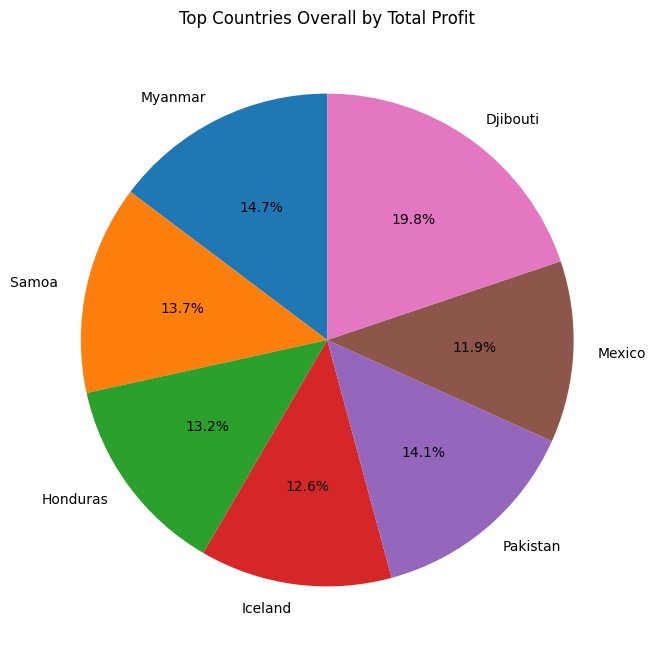

In [11]:
# pie chart for top-selling countries overall
plt.figure(figsize=(8, 8))
plt.pie(top_countries_by_region['Total Profit'], labels=top_countries_by_region['Country'], autopct='%1.1f%%', startangle=90)
plt.title('Top Countries Overall by Total Profit')

plt.show()

In [12]:
fdf.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Day,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,28,28,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,22,22,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2,2,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,20,20,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,1,1,2013


In [13]:
# Group by 'ItemType' and calculate total revenue, total cost, and total profit for each item type
item_type_analysis = fdf.groupby('Item Type').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Identify top-selling items based on total units sold
top_selling_items = item_type_analysis.nlargest(5, 'Units Sold')

# Display the DataFrame with ItemType Analysis
#print(item_type_analysis)

# Display the DataFrame with Top Selling Items
print(top_selling_items)

       Item Type  Total Revenue   Total Cost  Total Profit  Units Sold
4      Cosmetics    36601509.60  22045460.94   14556048.66       83718
3        Clothes     7787292.80   2553958.40    5233334.40       71260
1      Beverages     2690794.60   1802747.32     888047.28       56708
5         Fruits      466481.34    345986.16     120495.18       49998
9  Personal Care     3980904.84   2760282.36    1220622.48       48708


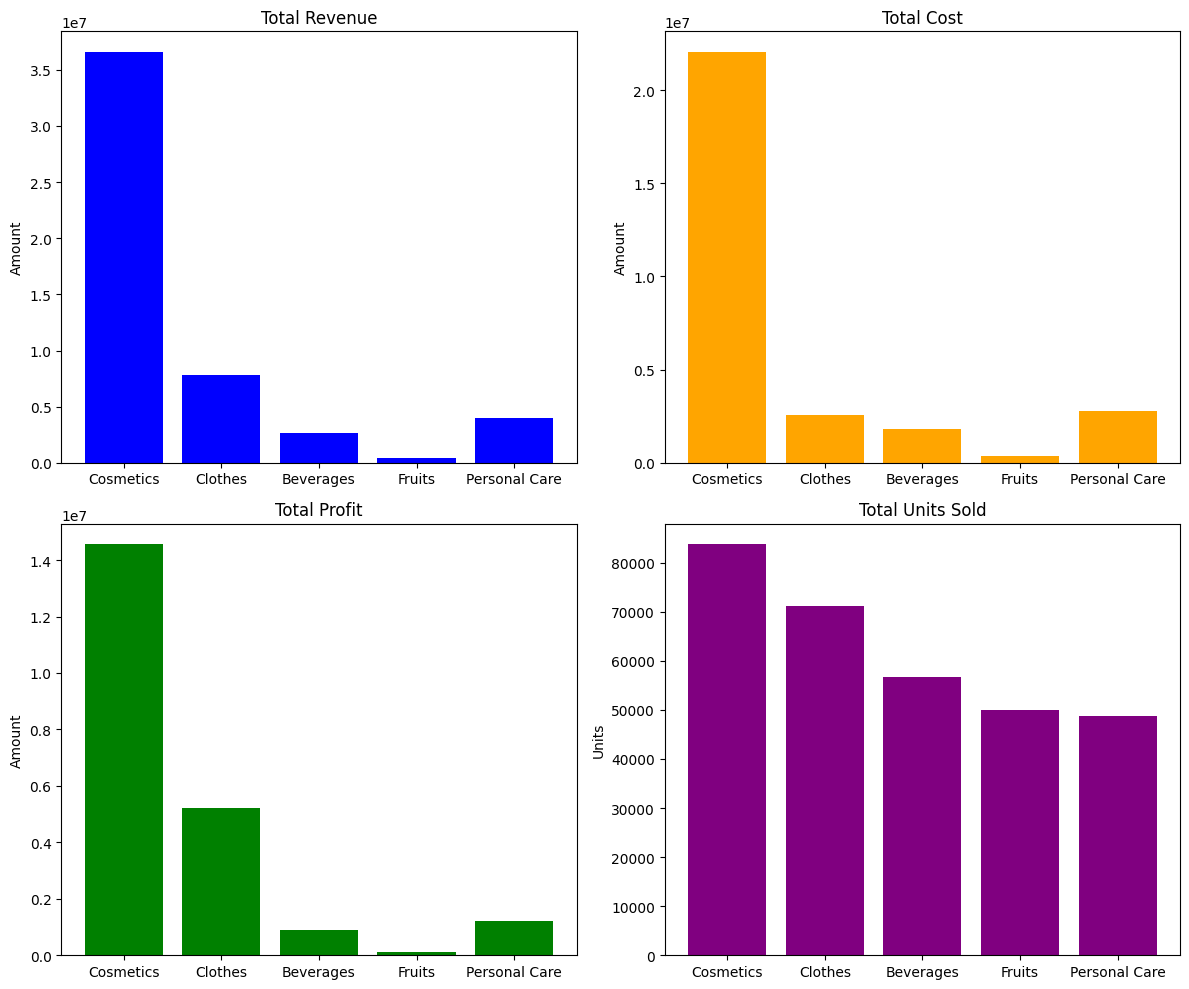

In [14]:
# Plot a bar chart for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Total Revenue
axs[0, 0].bar(top_selling_items['Item Type'], top_selling_items['Total Revenue'], color='blue')
axs[0, 0].set_title('Total Revenue')
axs[0, 0].set_ylabel('Amount')

# Total Cost
axs[0, 1].bar(top_selling_items['Item Type'], top_selling_items['Total Cost'], color='orange')
axs[0, 1].set_title('Total Cost')
axs[0, 1].set_ylabel('Amount')

# Total Profit
axs[1, 0].bar(top_selling_items['Item Type'], top_selling_items['Total Profit'], color='green')
axs[1, 0].set_title('Total Profit')
axs[1, 0].set_ylabel('Amount')

# Total Units Sold
axs[1, 1].bar(top_selling_items['Item Type'], top_selling_items['Units Sold'], color='purple')
axs[1, 1].set_title('Total Units Sold')
axs[1, 1].set_ylabel('Units')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Group by 'Sales Channel' and calculate total revenue, total cost, and total profit for each channel
sales_channel_analysis = df.groupby('Sales Channel').agg({
    'Total Profit': 'sum',
}).reset_index()

top_channels_profit = sales_channel_analysis.nlargest(3, 'Total Profit')

# Display the DataFrame with Top Sales Channels by Profit
print(top_channels_profit)

  Sales Channel  Total Profit
0       Offline   24920726.67
1        Online   19247471.73


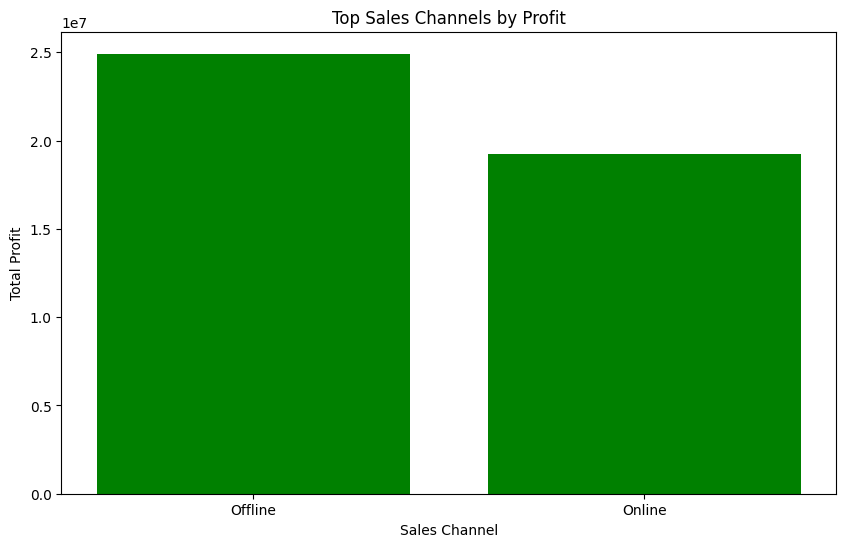

In [16]:
# Plot a bar chart for Top Sales Channels by Profit
plt.figure(figsize=(10, 6))
plt.bar(top_channels_profit['Sales Channel'], top_channels_profit['Total Profit'], color='green')
plt.title('Top Sales Channels by Profit')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')

# Show the plot
plt.show()

C:\Users\Khushi\AppData\Local\Temp\ipykernel_13248\1823079197.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_items_online['Item Type'], rotation=45, ha='right')
C:\Users\Khushi\AppData\Local\Temp\ipykernel_13248\1823079197.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_items_offline['Item Type'], rotation=45, ha='right')


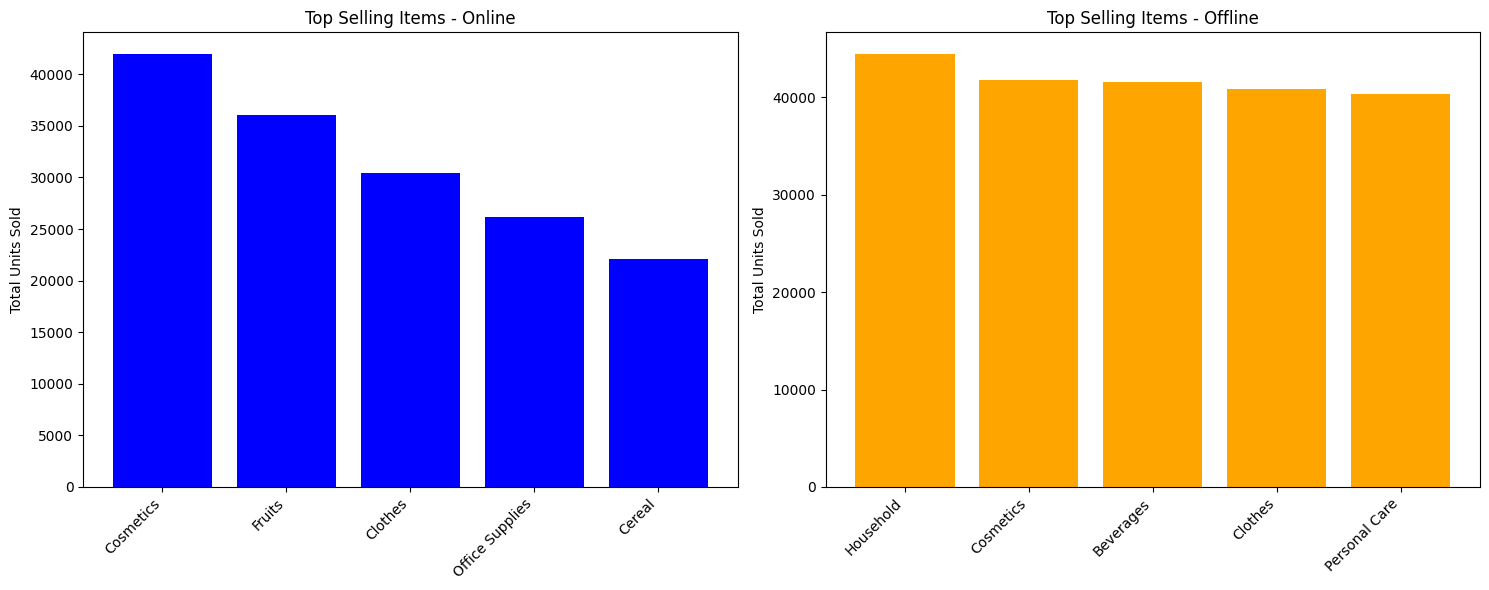

In [17]:
# Filter data for online and offline sales channels
online_data = df[df['Sales Channel'] == 'Online']
offline_data = df[df['Sales Channel'] == 'Offline']

# Group by 'Item Type' and calculate total units sold for each item in online and offline channels
top_items_online = online_data.groupby('Item Type')['Units Sold'].sum().nlargest(5).reset_index()
top_items_offline = offline_data.groupby('Item Type')['Units Sold'].sum().nlargest(5).reset_index()

# Plot bar charts for top-selling items in online and offline channels
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Top Selling Items Online
axs[0].bar(top_items_online['Item Type'], top_items_online['Units Sold'], color='blue')
axs[0].set_title('Top Selling Items - Online')
axs[0].set_ylabel('Total Units Sold')
axs[0].set_xticklabels(top_items_online['Item Type'], rotation=45, ha='right')

# Top Selling Items Offline
axs[1].bar(top_items_offline['Item Type'], top_items_offline['Units Sold'], color='orange')
axs[1].set_title('Top Selling Items - Offline')
axs[1].set_ylabel('Total Units Sold')
axs[1].set_xticklabels(top_items_offline['Item Type'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

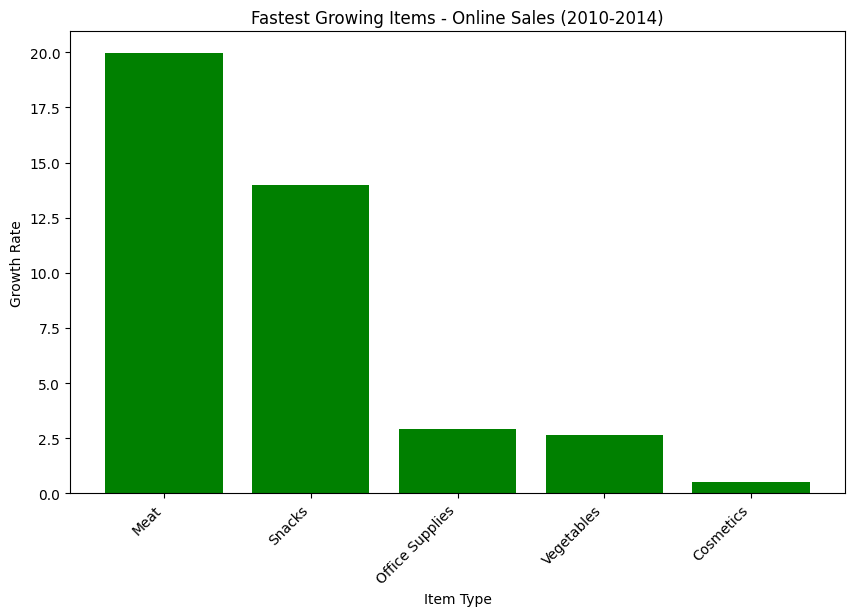

In [18]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Filter data for online sales channel and date range from 2010 to 2014
online_data = df[(df['Sales Channel'] == 'Online') & (df['Order Date'].dt.year.between(2010, 2014))]

# Group by 'Item Type' and calculate the growth rate for each item
item_growth = online_data.groupby('Item Type').agg({
    'Units Sold': 'sum'
}).pct_change().nlargest(5, 'Units Sold').reset_index()

# Plot a bar chart for the fastest-growing items
plt.figure(figsize=(10, 6))
plt.bar(item_growth['Item Type'], item_growth['Units Sold'], color='green')
plt.title('Fastest Growing Items - Online Sales (2010-2014)')
plt.xlabel('Item Type')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

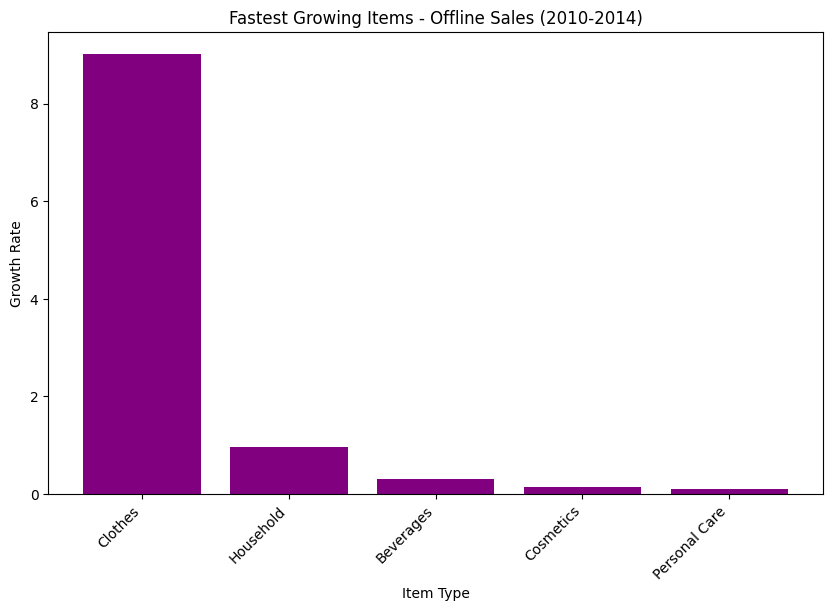

In [19]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Filter data for offline sales channel and date range from 2010 to 2014
offline_data = df[(df['Sales Channel'] == 'Offline') & (df['Order Date'].dt.year.between(2010, 2014))]

# Group by 'Item Type' and calculate the growth rate for each item
item_growth_offline = offline_data.groupby('Item Type').agg({
    'Units Sold': 'sum'
}).pct_change().nlargest(5, 'Units Sold').reset_index()

# Plot a bar chart for the fastest-growing items in offline sales
plt.figure(figsize=(10, 6))
plt.bar(item_growth_offline['Item Type'], item_growth_offline['Units Sold'], color='purple')
plt.title('Fastest Growing Items - Offline Sales (2010-2014)')
plt.xlabel('Item Type')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

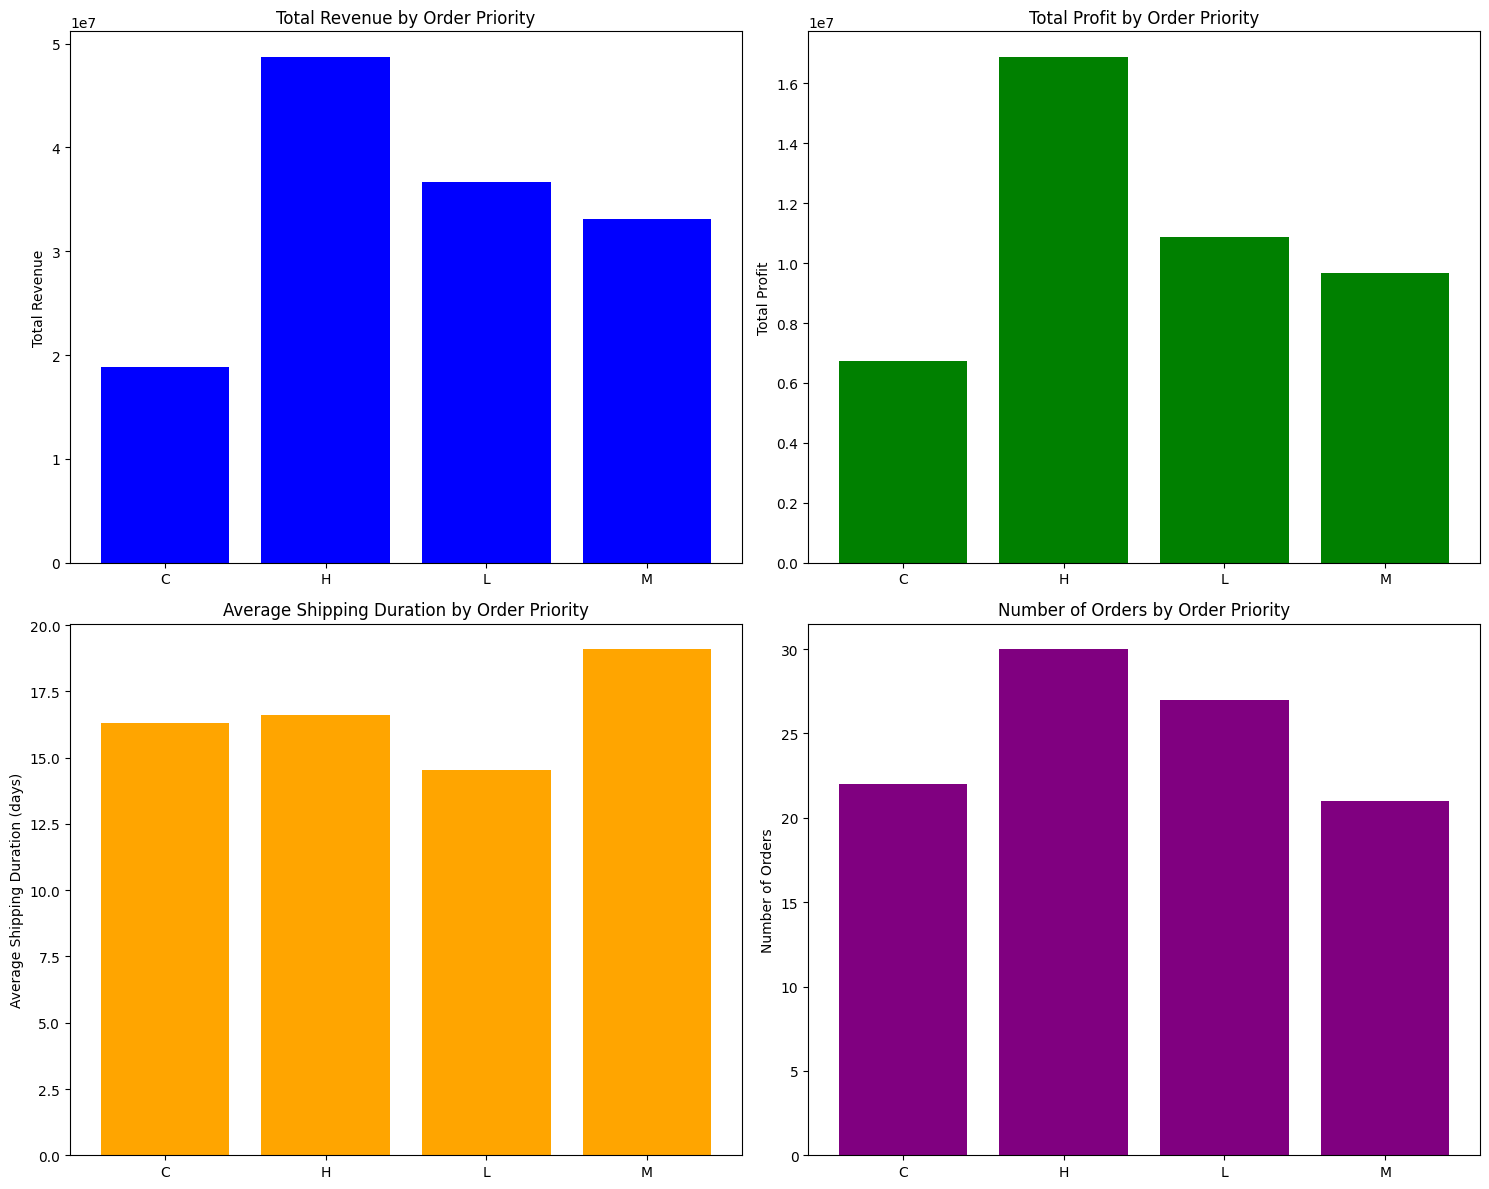

In [20]:
# Convert 'Order Date' and 'Ship Date' to datetime format
fdf['Order Date'] = pd.to_datetime(fdf['Order Date'], format='%m/%d/%Y')
fdf['Ship Date'] = pd.to_datetime(fdf['Ship Date'], format='%m/%d/%Y')

# Group by 'Order Priority' and analyze the impact on sales
order_priority_analysis = fdf.groupby('Order Priority').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Order Day': 'mean'  # Average shipping duration
}).reset_index()

# Plot bar charts to visualize the impact of order priority
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Total Revenue
axs[0, 0].bar(order_priority_analysis['Order Priority'], order_priority_analysis['Total Revenue'], color='blue')
axs[0, 0].set_title('Total Revenue by Order Priority')
axs[0, 0].set_ylabel('Total Revenue')

# Total Profit
axs[0, 1].bar(order_priority_analysis['Order Priority'], order_priority_analysis['Total Profit'], color='green')
axs[0, 1].set_title('Total Profit by Order Priority')
axs[0, 1].set_ylabel('Total Profit')

# Average Shipping Duration
axs[1, 0].bar(order_priority_analysis['Order Priority'], order_priority_analysis['Order Day'], color='orange')
axs[1, 0].set_title('Average Shipping Duration by Order Priority')
axs[1, 0].set_ylabel('Average Shipping Duration (days)')

# Number of Orders
axs[1, 1].bar(order_priority_analysis['Order Priority'], fdf['Order ID'].groupby(fdf['Order Priority']).count(), color='purple')
axs[1, 1].set_title('Number of Orders by Order Priority')
axs[1, 1].set_ylabel('Number of Orders')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

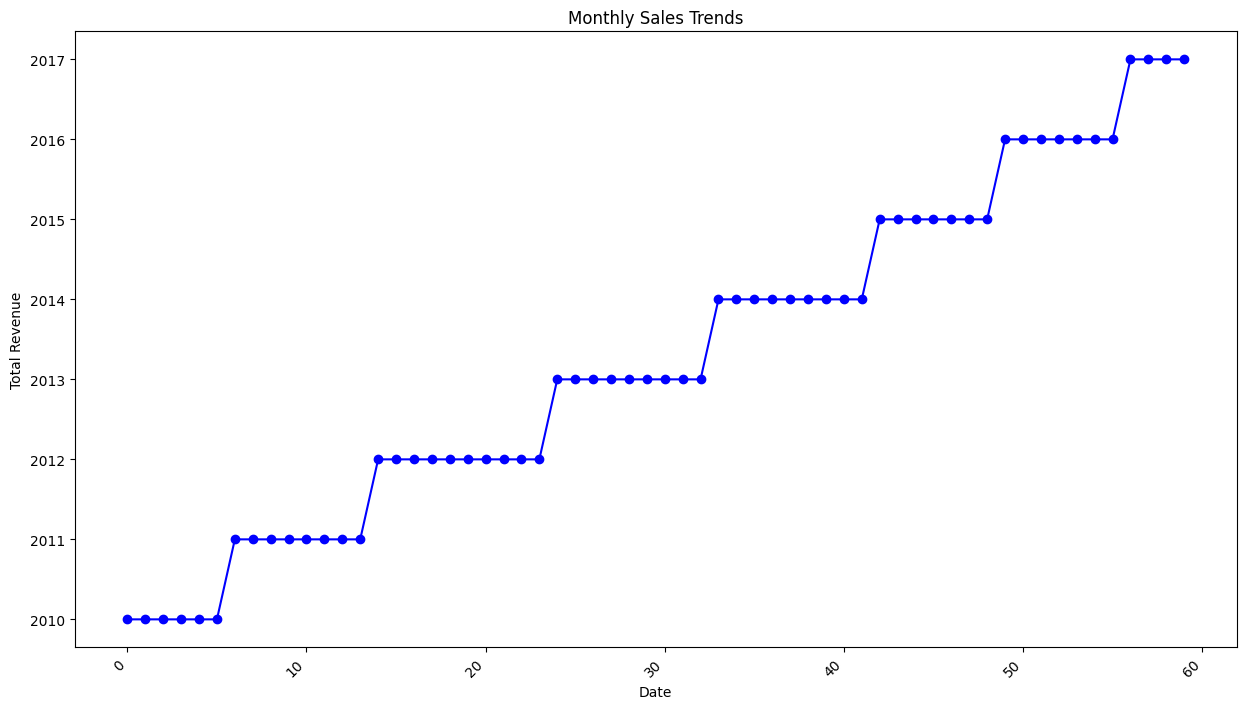

In [21]:
# Convert 'Order Date' to datetime format
fdf['Order Date'] = pd.to_datetime(fdf['Order Date'], format='%m/%d/%Y')

# Extract year and month from 'Order Date'
fdf['Year'] = fdf['Order Date'].dt.year
fdf['Month'] = fdf['Order Date'].dt.month_name()

# Group by year and month and calculate total revenue
monthly_sales = fdf.groupby(['Year', 'Month']).agg({'Total Revenue': 'sum'}).reset_index()


# Plot a line chart to visualize order date trends
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales['Year'], marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

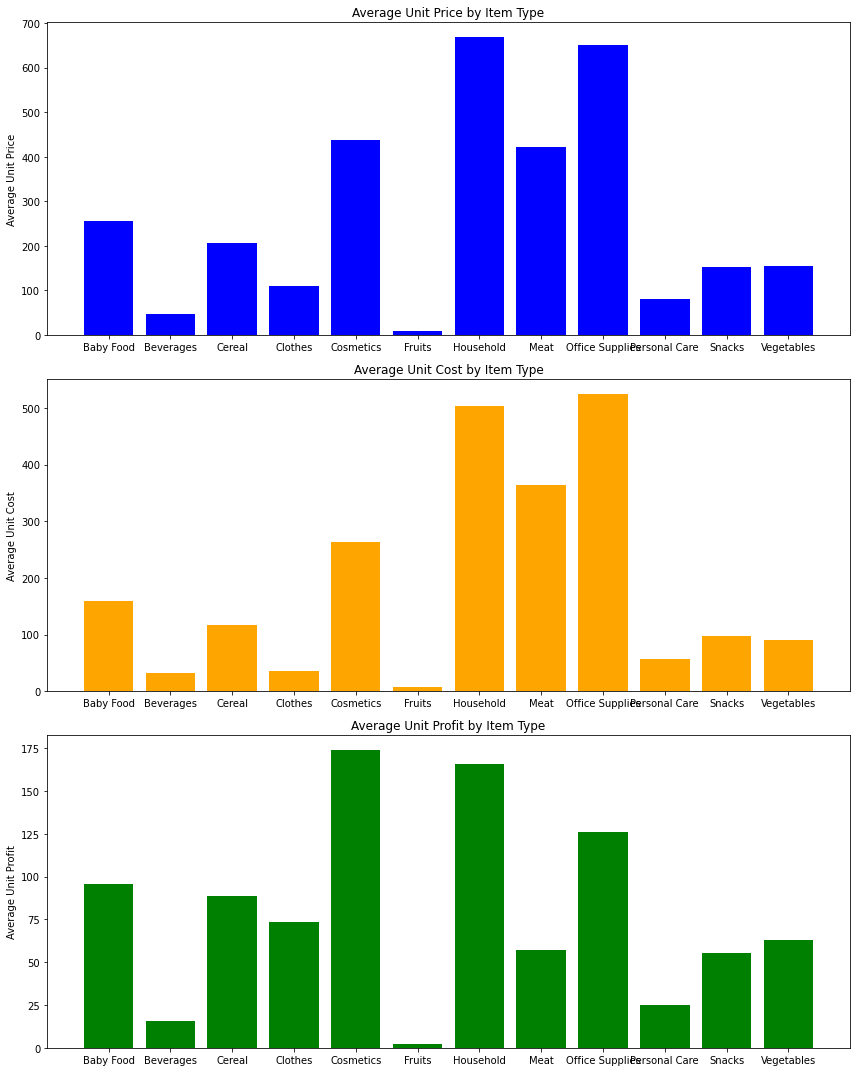

In [24]:
# Calculate unit price, unit cost, and unit profit
fdf['Unit Price'] = fdf['Total Revenue'] / fdf['Units Sold']
fdf['Unit Cost'] = fdf['Total Cost'] / fdf['Units Sold']
fdf['Unit Profit'] = fdf['Total Profit'] / fdf['Units Sold']

# Group by 'ItemType' and analyze unit economics
item_type_analysis = fdf.groupby('Item Type').agg({
    'Unit Price': 'mean',
    'Unit Cost': 'mean',
    'Unit Profit': 'mean'
}).reset_index()

# Plot bar charts to visualize unit economics by item type
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Unit Price
axs[0].bar(item_type_analysis['Item Type'], item_type_analysis['Unit Price'], color='blue')
axs[0].set_title('Average Unit Price by Item Type')
axs[0].set_ylabel('Average Unit Price')

# Unit Cost
axs[1].bar(item_type_analysis['Item Type'], item_type_analysis['Unit Cost'], color='orange')
axs[1].set_title('Average Unit Cost by Item Type')
axs[1].set_ylabel('Average Unit Cost')

# Unit Profit
axs[2].bar(item_type_analysis['Item Type'], item_type_analysis['Unit Profit'], color='green')
axs[2].set_title('Average Unit Profit by Item Type')
axs[2].set_ylabel('Average Unit Profit')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

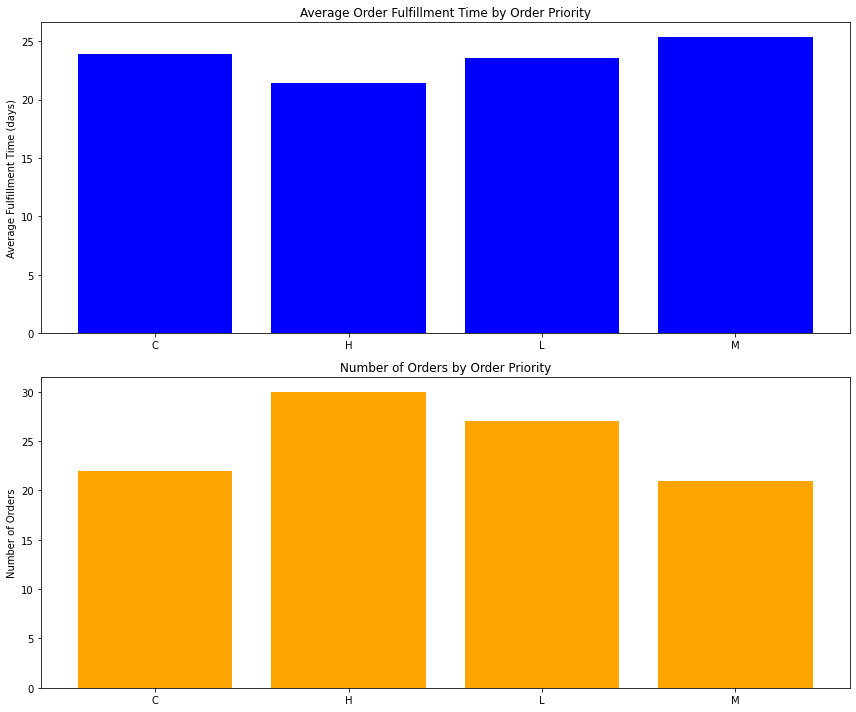

In [25]:
# Calculate order fulfillment time in days
fdf['Fulfillment Time'] = (fdf['Ship Date'] - fdf['Order Date']).dt.days

# Group by 'Order Priority' and analyze order fulfillment times
order_priority_analysis = fdf.groupby('Order Priority').agg({
    'Fulfillment Time': 'mean',
    'Order ID': 'count'  # Number of orders for each priority
}).reset_index()

# Plot bar charts to visualize order fulfillment times by order priority
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Fulfillment Time
axs[0].bar(order_priority_analysis['Order Priority'], order_priority_analysis['Fulfillment Time'], color='blue')
axs[0].set_title('Average Order Fulfillment Time by Order Priority')
axs[0].set_ylabel('Average Fulfillment Time (days)')

# Number of Orders
axs[1].bar(order_priority_analysis['Order Priority'], order_priority_analysis['Order ID'], color='orange')
axs[1].set_title('Number of Orders by Order Priority')
axs[1].set_ylabel('Number of Orders')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

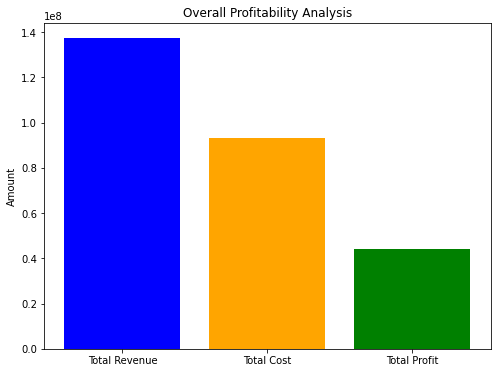

In [26]:
# Calculate total revenue, total cost, and total profit
total_revenue = df['Total Revenue'].sum()
total_cost = df['Total Cost'].sum()
total_profit = df['Total Profit'].sum()

# Create a DataFrame for overall profitability
overall_profitability = pd.DataFrame({
    'Category': ['Total Revenue', 'Total Cost', 'Total Profit'],
    'Amount': [total_revenue, total_cost, total_profit]
})

# Plot a bar chart to visualize overall profitability
plt.figure(figsize=(8, 6))
plt.bar(overall_profitability['Category'], overall_profitability['Amount'], color=['blue', 'orange', 'green'])
plt.title('Overall Profitability Analysis')
plt.ylabel('Amount')

# Show the plot
plt.show()

In [22]:
# Assuming 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extracting month, year, and yearly-month
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Yearly-Month'] = df['Order Date'].dt.to_period('M')

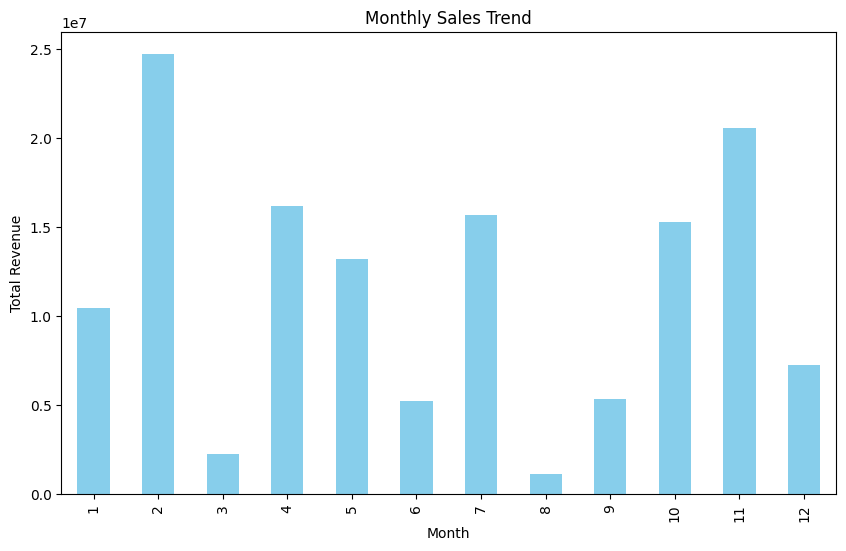

In [23]:
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

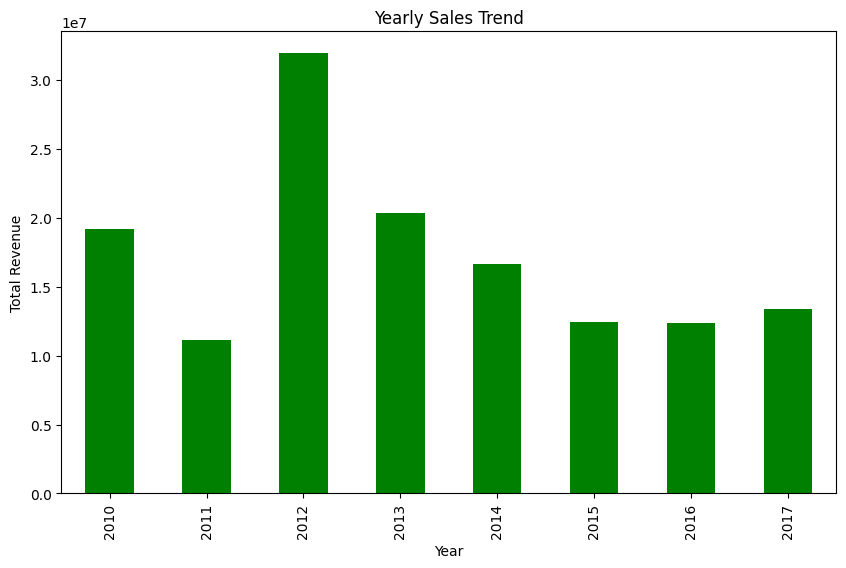

In [25]:
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='green')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

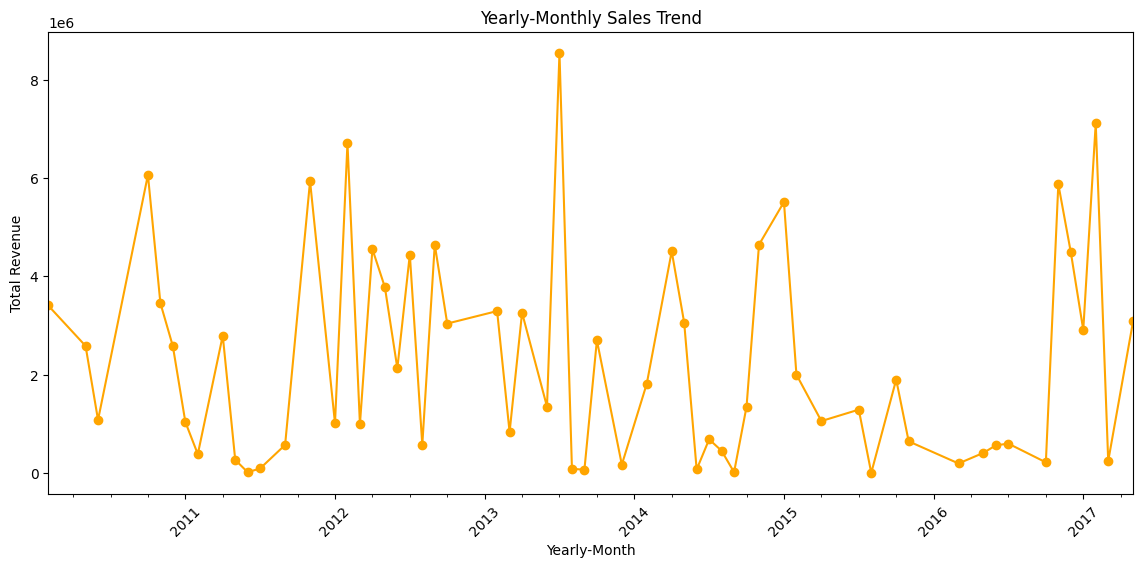

In [26]:
yearly_monthly_sales = df.groupby('Yearly-Month')['Total Revenue'].sum()

plt.figure(figsize=(14, 6))
yearly_monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Yearly-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()